In [157]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import mne
from scipy.stats import ttest_rel, ttest_1samp, ttest_ind, kstest, wilcoxon

import glob
import os

import pickle
import sys

sys.path.append('../utils')
from ERP_utils import *

In [158]:
all_subjects = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21']

good_listen_subjects = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21']
good_motor_subjects = ['01', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '18', '19', '20'] #double check 21


nonmusicians = ['01', '04', '03', '05', '08', '09', '10', '11', '16', '19', '20']
musicians = ['02', '06', '07', '12', '13', '14', '15', '17', '18', '21']
#musicians = ['02', '12', '14', '18'] #high-level musicians


"""# Define mappings for tasks and participant groups
task_subjects = {
    'listen': good_listen_subjects,
    'motor': good_motor_subjects
}

participant_groups = {
    'all': lambda subjects: subjects,
    'musicians': lambda subjects: [x for x in subjects if x in musicians],
    'nonmusicians': lambda subjects: [x for x in subjects if x in nonmusicians]
}

# Get the list of subjects based on task and participant group
subjects_to_process = participant_groups[participants](task_subjects[task])"""



"# Define mappings for tasks and participant groups\ntask_subjects = {\n    'listen': good_listen_subjects,\n    'motor': good_motor_subjects\n}\n\nparticipant_groups = {\n    'all': lambda subjects: subjects,\n    'musicians': lambda subjects: [x for x in subjects if x in musicians],\n    'nonmusicians': lambda subjects: [x for x in subjects if x in nonmusicians]\n}\n\n# Get the list of subjects based on task and participant group\nsubjects_to_process = participant_groups[participants](task_subjects[task])"

In [159]:
subjects_to_process = good_motor_subjects
task = 'motor'

In [160]:
#-----------------------------
#           DIRECTORIES
#-----------------------------

evoked_dir = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_{task}/{task}_ERP_data'
epochs_dir = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_{task}/{task}_epochs_data'
figs_dir = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/figures'

#get channel names
with open('../utils/ch_names.pkl', 'rb') as file:
    ch_names_all = pickle.load(file)

ch_names_72 = ch_names_all[0:72]
ch_names_64 = ch_names_all[0:64]
downfreq = 128

In [161]:
#-----------------------------
#           GROUPING EVOKEDS
#-----------------------------

evoked_list_pre = []
epochs_list_pre = []
evoked_list_post = []
epochs_list_post = []

#subject averages
epochs_list_pre_sa =[]

#for file in sorted(os.listdir(evoked_dir)):

for subject in subjects_to_process:
    print('Processing subject: ', subject)

    file_evokeds_pre = glob.glob(os.path.join(evoked_dir, f'{task}_ERP_pre_{subject}.fif'))[0]
    file_epochs_pre = glob.glob(os.path.join(epochs_dir, f'{task}_epochs_pre_{subject}.fif'))[0]
  
    evoked_pre = mne.read_evokeds(file_evokeds_pre)[0]
    evoked_list_pre.append(evoked_pre)
    epochs_pre = mne.read_epochs(file_epochs_pre)
    epochs_list_pre.append(epochs_pre)

    file_evokeds_post = glob.glob(os.path.join(evoked_dir, f'{task}_ERP_post_{subject}.fif'))[0]
    file_epochs_post = glob.glob(os.path.join(epochs_dir, f'{task}_epochs_post_{subject}.fif'))[0]
  
    evoked_post = mne.read_evokeds(file_evokeds_post)[0]
    evoked_list_post.append(evoked_post)
    epochs_post = mne.read_epochs(file_epochs_post)
    epochs_list_post.append(epochs_post)


concat_epochs_pre = mne.concatenate_epochs(epochs_list_pre)
concat_evoked_pre = mne.combine_evoked(evoked_list_pre, weights = 'equal')

concat_epochs_post = mne.concatenate_epochs(epochs_list_post)
concat_evoked_post = mne.combine_evoked(evoked_list_post, weights = 'equal')


Processing subject:  01
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 353 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
353 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_post_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_82740/1353575689.py:21: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_01.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_pre = mne.read_evokeds(file_evokeds_pre)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_82740/1353575689.py:23: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_01.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_pre = mne.read_epochs(file_epochs_pre)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_82740/1353575689.py:29: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/moto

    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
525 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  05
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_05.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 245 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_05.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
245 matching events found
No baseline correction appl

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_82740/1353575689.py:21: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_05.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_pre = mne.read_evokeds(file_evokeds_pre)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_82740/1353575689.py:23: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_05.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_pre = mne.read_epochs(file_epochs_pre)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_82740/1353575689.py:29: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/moto

Not setting metadata
277 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  08
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_08.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 255 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_08.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
255 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ER

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_82740/1353575689.py:21: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_08.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_pre = mne.read_evokeds(file_evokeds_pre)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_82740/1353575689.py:23: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_08.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_pre = mne.read_epochs(file_epochs_pre)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_82740/1353575689.py:29: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/moto

Not setting metadata
323 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_post_11.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 351 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_post_11.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
351 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  12
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_82740/1353575689.py:29: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_post_11.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_post = mne.read_evokeds(file_evokeds_post)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_82740/1353575689.py:31: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_post_11.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_post = mne.read_epochs(file_epochs_post)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_82740/1353575689.py:21: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_dat

    Found the data of interest:
        t =    -203.12 ...     500.00 ms (6)
        0 CTF compensation matrices available
        nave = 348 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_post_13.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
348 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  14
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_14.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (6)
        0 CTF compensation matrices available
        nave = 338 - aspect type = 100
No projector specified for thi

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_82740/1353575689.py:31: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_post_13.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_post = mne.read_epochs(file_epochs_post)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_82740/1353575689.py:21: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_14.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_pre = mne.read_evokeds(file_evokeds_pre)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_82740/1353575689.py:23: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_dat

    Found the data of interest:
        t =    -203.12 ...     500.00 ms (6)
        0 CTF compensation matrices available
        nave = 385 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_16.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
385 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_post_16.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (6)
        0 CTF compensation matrices available
        nave = 407 - aspect type = 100
No projector specified for this dataset. Please consid

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_82740/1353575689.py:23: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_16.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_pre = mne.read_epochs(file_epochs_pre)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_82740/1353575689.py:29: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_post_16.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_post = mne.read_evokeds(file_evokeds_post)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_82740/1353575689.py:31: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_dat

    Found the data of interest:
        t =    -203.12 ...     500.00 ms (6)
        0 CTF compensation matrices available
        nave = 351 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_19.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
351 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_post_19.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (6)
        0 CTF compensation matrices available
        nave = 318 - aspect type = 100
No projector specified for this dataset. Please consid

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_82740/1353575689.py:23: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_19.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_pre = mne.read_epochs(file_epochs_pre)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_82740/1353575689.py:29: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_post_19.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_post = mne.read_evokeds(file_evokeds_post)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_82740/1353575689.py:31: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_dat

    Found the data of interest:
        t =    -203.12 ...     500.00 ms (6)
        0 CTF compensation matrices available
        nave = 271 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_post_20.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
271 matching events found
No baseline correction applied
0 projection items activated


/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_82740/1353575689.py:31: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_post_20.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_post = mne.read_epochs(file_epochs_post)


Not setting metadata
5726 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
5573 matching events found
Applying baseline correction (mode: mean)


In [162]:
def compute_power(epochs, tmin = 0, tmax = 0.25, bands=['delta', 'theta', 'alpha', 'beta', 'gamma', 'all'], method = 'welch'):
    """
    Returns a DataFrame with power computed over each frequency band for given epochs.
    
    Parameters
    ----------
    epochs : mne.Epochs
        The epochs for which to compute the PSD and power.
    bands : list of str, optional
        List of frequency bands to compute power for. Default is ['delta', 'alpha'].
        
    Returns
    -------
    df : pd.DataFrame
        DataFrame where each column represents the power in a different frequency band.
    """

    freqbands = {'delta': [0.5, 4], 
                 'theta': [4, 8],
                 'alpha': [8, 12],
                 'beta': [12, 30],
                 'gamma': [30, 45],
                 'all': [0.5, 45]
                }

    
    power_dict = {}
    for key in bands:
        if key not in freqbands:
            continue  
        fmin, fmax = freqbands[key]

        psd = mne.Epochs.compute_psd(epochs, 
                                     method = method,
                                     fmin=fmin, 
                                     fmax=fmax, 
                                     tmin = tmin, 
                                     tmax = tmax)
        
        psd_ave_64 = psd.average() #average over epochs
        psd_ave = np.mean(psd_ave_64.get_data(), axis = 0) #average over channel

        #integrate PSD
        power = np.trapz(psd_ave)

        # save PSD
        power_dict[key] = power


    df = pd.DataFrame([power_dict])

    return df


In [173]:
bands_tocompute = ['delta', 'alpha', 'beta', 'gamma', 'theta', 'all']




for j, epochs_list in enumerate([epochs_list_pre, epochs_list_post]):
    power_data_list = []
    epochs_tocompute = epochs_list[j]


    for i, subject in enumerate(subjects_to_process): 

        # Compute the power for the current subject
        power_data = compute_power(epochs_tocompute[i], 
                                    tmin = 0,
                                    tmax = 0.5,
                                     bands = bands_tocompute)

        # Record subject info
        power_data['subject'] = subject
        power_data['musician'] = [1 if subject in musicians else 0]

        # Append the power data to the list
        power_data_list.append(power_data)

    # Concatenate subject data
        ####### THIS IS INCORRECT, I'M JUST CHANGING IT TO CHECK
    if j == 0:
        power_pre_df = pd.concat(power_data_list, ignore_index=True)
 
    elif j == 1:
        power_post_df =  pd.concat(power_data_list, ignore_index=True)


Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)


Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective window size : 0.508 (s)
Effective wind

In [174]:
power_pre_df['period'] = 'pre'
power_post_df['period'] = 'post'
power_all_df = pd.concat([power_pre_df, power_post_df])

In [175]:
power_all_df.to_csv(f'power_{task}.csv', index = False)

/Users/cindyzhang/anaconda3/envs/eelbrain-cnsp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cindyzhang/anaconda3/envs/eelbrain-cnsp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cindyzhang/anaconda3/envs/eelbrain-cnsp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cindyzhang/anaconda3/envs/eelbrain-cnsp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

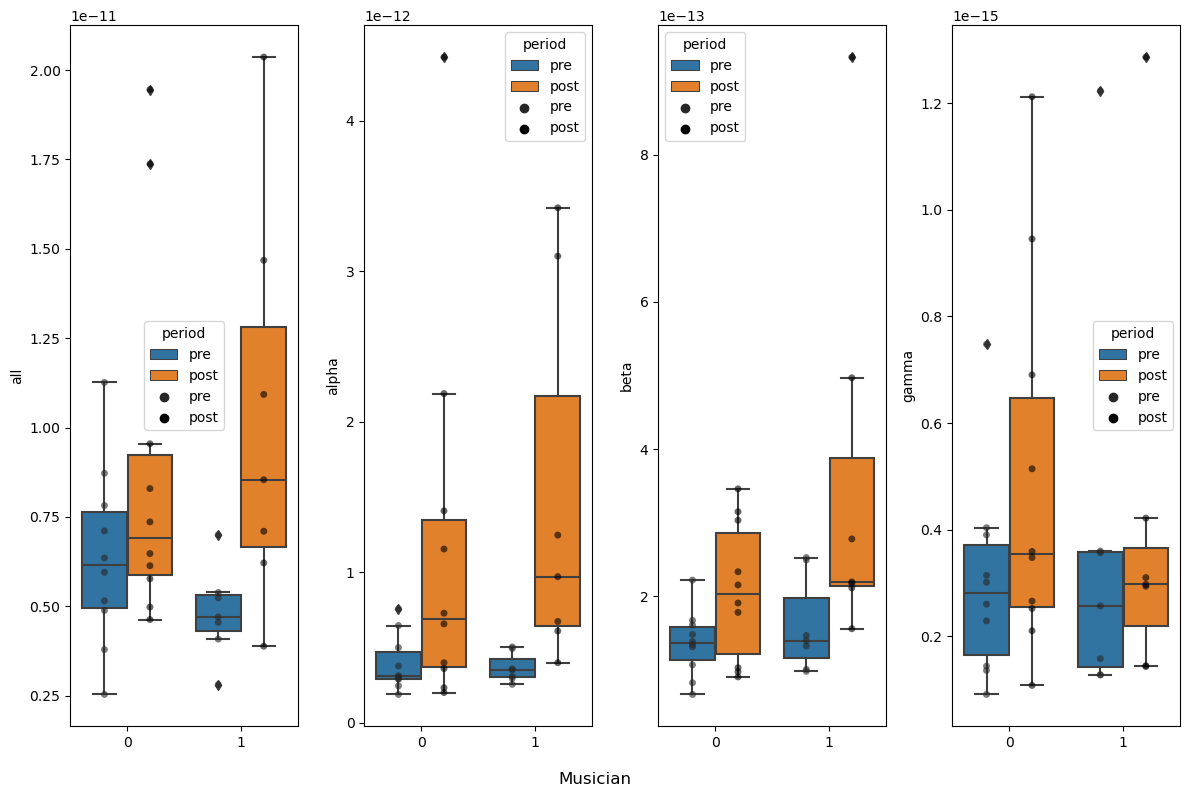

In [176]:
bands = ['all', 'alpha', 'beta', 'gamma']

fig, axes = plt.subplots(nrows=1, ncols=len(bands), figsize=(12, 8), sharey=False)

for i, band in enumerate(bands):
    sns.boxplot(power_all_df, x='musician', y=band, hue='period', ax=axes[i])
    sns.stripplot(power_all_df, x='musician', y=band, hue='period',
                  color='black', jitter=False, dodge=True, alpha=0.6, ax=axes[i])
    axes[i].set_ylabel(band)
    axes[i].set_xlabel('')

fig.supxlabel('Musician')

plt.tight_layout()
plt.show()


combining channels using "mean"
combining channels using "mean"


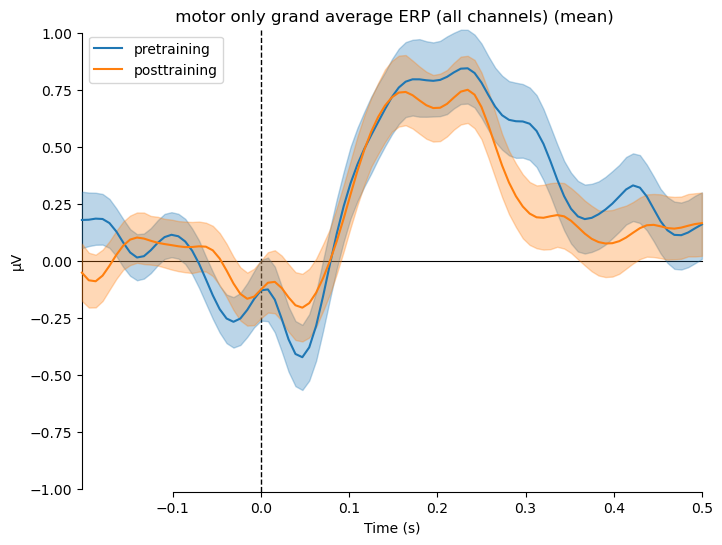

[<Figure size 800x600 with 1 Axes>]

In [177]:
ga = dict(
        pretraining=list(concat_epochs_pre.iter_evoked()),
        posttraining=list(concat_epochs_post.iter_evoked()))
mne.viz.plot_compare_evokeds(ga, title = f' {task} only grand average ERP (all channels)',combine = 'mean')